In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
# train data
train_df = pd.read_csv("train.csv")
print(train_df.count())
print(f"The number of train set articles: {train_df.shape[0]}")
print("Category: ", train_df['Category'].unique())
print(train_df.shape)
train_df

ArticleId    428
Text         428
Category     428
dtype: int64
The number of train set articles: 428
Category:  ['tech' 'entertainment']
(428, 3)


,ArticleId,Text,Category
0,1976,lifestyle governs mobile choice faster better ...,tech
1,1797,french honour director parker british film dir...,entertainment
2,1866,fockers fuel festive film chart comedy meet fo...,entertainment
3,1153,housewives lift channel 4 ratings debut us tel...,entertainment
4,342,u2 desire number one u2 three prestigious gram...,entertainment
...,...,...,...
423,1388,parker saxophone heads auction saxophone belon...,entertainment
424,1917,wine comedy wins critics award quirky comedy s...,entertainment
425,1122,playstation 3 processor unveiled cell processo...,tech
426,2166,briton wins short film oscar three five nomine...,entertainment


In [3]:
# test data
test_df = pd.read_csv("test.csv")
test_number_of_articles = test_df.count()
print(f"The number of train set articles: {test_number_of_articles}")
print("Category: ", test_df['Category'].unique())
print(test_df.shape)

The number of train set articles: ArticleId    106
Text         106
Category     106
dtype: int64
Category:  ['entertainment' 'tech']
(106, 3)


In [4]:
train_X = train_df.Text
train_Y = train_df.Category
print(train_X)
test_X = test_df.Text
test_Y = test_df.Category
print(test_X)

0      lifestyle governs mobile choice faster better ...
1      french honour director parker british film dir...
2      fockers fuel festive film chart comedy meet fo...
3      housewives lift channel 4 ratings debut us tel...
4      u2 desire number one u2 three prestigious gram...
                             ...                        
423    parker saxophone heads auction saxophone belon...
424    wine comedy wins critics award quirky comedy s...
425    playstation 3 processor unveiled cell processo...
426    briton wins short film oscar three five nomine...
427    uk broadband gets speed injection broadband ra...
Name: Text, Length: 428, dtype: object
0      johnny denise lose passport johnny vaughan den...
1      bt offers free net phone calls bt offering cus...
2      power people says hp digital revolution focuse...
3      stars gear bafta ceremony film stars across gl...
4      controversial film tops festival controversial...
                             ...                 

In [5]:
# fit the vectorizer on the training data
vec = CountVectorizer(stop_words = 'english')
vec.fit(train_X)
vec.vocabulary_

{'lifestyle': 7139,
 'governs': 5496,
 'mobile': 7850,
 'choice': 2464,
 'faster': 4731,
 'better': 1596,
 'funkier': 5195,
 'hardware': 5728,
 'going': 5456,
 'help': 5828,
 'phone': 8898,
 'firms': 4903,
 'sell': 10692,
 'handsets': 5701,
 'research': 10071,
 'suggests': 11659,
 'instead': 6408,
 'keen': 6799,
 'customers': 3305,
 'pushing': 9552,
 'technology': 11956,
 'sake': 10458,
 'consumers': 2985,
 'far': 4715,
 'interested': 6450,
 'fit': 4910,
 'screen': 10606,
 'size': 10999,
 'onboard': 8410,
 'memory': 7664,
 'chip': 2461,
 'inside': 6383,
 'shows': 10902,
 'depth': 3580,
 'study': 11578,
 'handset': 5700,
 'maker': 7413,
 'ericsson': 4413,
 'historically': 5901,
 'industry': 6310,
 'focus': 4987,
 'using': 12695,
 'said': 10452,
 'dr': 3968,
 'michael': 7729,
 'bjorn': 1658,
 'senior': 10712,
 'advisor': 700,
 'media': 7627,
 'consumer': 2984,
 'enterprise': 4359,
 'lab': 6914,
 'stop': 11481,
 'saying': 10522,
 'technologies': 11955,
 'change': 2376,
 'lives': 7224,
 't

In [6]:
# for train
X_transformed = vec.transform(train_X)
X_transformed

<428x13355 sparse matrix of type '<class 'numpy.int64'>'
	with 65835 stored elements in Compressed Sparse Row format>

In [7]:
# for test
X_test_transformed = vec.transform(test_X)
X_test_transformed

<106x13355 sparse matrix of type '<class 'numpy.int64'>'
	with 14440 stored elements in Compressed Sparse Row format>

In [8]:
# to sparse matrix
pd.DataFrame(X_transformed.toarray(), columns= [vec.get_feature_names()])
pd.DataFrame(X_test_transformed.toarray(), columns= [vec.get_feature_names()])

,00,000,000th,001st,0051,007,0100,0130,028,05,...,zola,zombie,zombies,zone,zonealarm,zones,zoom,zooms,zooropa,zorro
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### fit the logistic regression model with C = 1 / λ, which means the the smaller values of C, the stronger regularization as we penalize the model hard.

In [9]:
# Logistic Regression
logit = LogisticRegression(C = 1)
logit.fit(X_transformed, train_Y)

LogisticRegression(C=1)

In [10]:
logit.classes_

array(['entertainment', 'tech'], dtype=object)

In [11]:
# here is we received the 𝑏₀ is -3.273, when the float C is eaqual to 1.
logit.intercept_

array([-3.27337897])

In [12]:
# here is we received the 𝑏₁.
logit.coef_

array([[ 0.00017551, -0.04041432, -0.00568926, ...,  0.00011831,
        -0.00054118, -0.00155509]])

In [13]:
# now we improve this model by setting different parameters. C = 5.
logit2 = LogisticRegression(C = 5)
logit2.fit(X_transformed, train_Y)

LogisticRegression(C=5)

In [14]:
# her is we received the 𝑏₀ is -4.06, when the float C is eaqual to 5.
logit2.intercept_

array([-4.05825561])

In [15]:
logit2.coef_

array([[ 1.17310166e-04, -5.42989029e-02, -7.10239229e-03, ...,
         5.51846891e-05, -5.23059882e-04, -1.57655381e-03]])

In [16]:
# now we improve this model by setting different parameters. C = 10.
logit3 = LogisticRegression(C = 10)
logit3.fit(X_transformed, train_Y)

LogisticRegression(C=10)

In [17]:
# her is we received the 𝑏₀ is -4.4, when the float C is eaqual to 10.
logit3.intercept_

array([-4.4077379])

In [18]:
logit3.coef_

array([[ 9.50029314e-05, -6.03672019e-02, -7.71713595e-03, ...,
         2.75045482e-05, -5.21618385e-04, -1.57079617e-03]])

### As we can see, the absolute values of the intercept 𝑏₀ and the coefficient 𝑏₁ are larger.  This is the case because the larger value of C means weaker regularization, or weaker penalization related to high values of 𝑏₀ and 𝑏₁.

In [19]:
# fit
logit.fit(X_transformed,train_Y)

# predict class
y_pred_class = logit.predict(X_test_transformed)


# predict probabilities
y_pred_proba = logit.predict_proba(X_test_transformed)


In [20]:
# printing the overall accuracy
metrics.accuracy_score(test_Y, y_pred_class)
print(f"the accuracy: {metrics.accuracy_score(test_Y, y_pred_class)}")

the accuracy: 1.0


In [21]:
from sklearn.metrics import explained_variance_score
new = []
for i in test_Y:
    if i =='entertainment':
        new.append(float(0))
    else:
        new.append(float(1))
new2 = []
for j in y_pred_class:
    if j =='entertainment':
        new2.append(float(0))
    else:
        new2.append(float(1))
y_true = new
y_pred = new2
explained_variance_score(new, new2)

1.0

### As we increase λ from 0, there is a variance and bias have an inverse relationship; because the variance decreases, the bias increases.

In [22]:
from sklearn.metrics import log_loss
log_loss(y_pred_class, y_pred_proba)

0.02592008831003724

### Setting the log loss with different values of the regulatization term

In [23]:
array=[]
for c in range(1,21):
    logit4 = LogisticRegression(C = c)
    logit4.fit(X_transformed, train_Y)
    # predict class
    y_pred_class4 = logit4.predict(X_test_transformed)

# predict probabilities
    y_pred_proba4 = logit4.predict_proba(X_test_transformed)
    print(log_loss(y_pred_class4, y_pred_proba4))
    array.append(log_loss(y_pred_class4, y_pred_proba4))

0.02592008831003724
0.022379773241416604
0.020690827865709836
0.0196242451750178
0.0188561086056147
0.018263919809996962
0.017807932299871872
0.017412326799199483
0.01708086203187401
0.016790417398386402
0.01654609857074757
0.01631013271984385
0.016105433255719923
0.0159119750912546
0.015748654900760328
0.015608269438753155
0.01544837329404808
0.015297996122818175
0.015186095110156027
0.01507765772994


### plot the specific λ values with log loss 


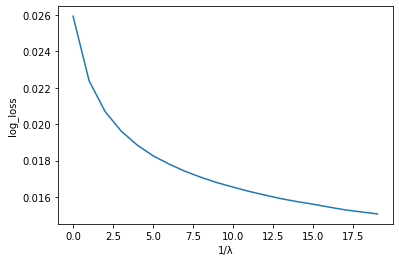

In [24]:
import matplotlib.pyplot as plt
plt.plot(array)
plt.ylabel('log_loss')
plt.xlabel('1/λ')
plt.show()

### Evaluation

In [44]:
from sklearn.model_selection import train_test_split
X = train_df.Text
y = train_df.Category
# different value of m
list1 = [0.1, 0.3, 0.5, 0.7, 0.9]
yvalue= [ ]

for i in list1:      
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = i, random_state = 1)

    X_transformed = vec.transform(X_train)
    X_transformed
    X_test_transformed = vec.transform(X_test)
    X_test_transformed
    model = LogisticRegression()
    model.fit(X_transformed, y_train)
    # predict class
    y_pred_class = model.predict(X_test_transformed)
    # predict probabilities
    y_pred_proba = model.predict_proba(X_test_transformed)
    print(f"training data accuracy: {metrics.accuracy_score(y_test, y_pred_class)}")  
    metrics.precision_score(y_test, y_pred_class, average = 'micro')
    metrics.recall_score(y_test, y_pred_class, average = 'micro')
    yvalue.append(metrics.f1_score(y_test, y_pred_class, average = 'micro'))

training data accuracy: 0.8678756476683938
training data accuracy: 0.9633333333333334
training data accuracy: 0.9626168224299065
training data accuracy: 0.9612403100775194
training data accuracy: 0.9767441860465116


In [49]:
X = test_df.Text
y = test_df.Category
xvalue = []
for i in list1:      
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = i, random_state = 1)

    X_transformed = vec.transform(X_train)
    X_transformed
    X_test_transformed = vec.transform(X_test)
    X_test_transformed
    model = LogisticRegression()
    model.fit(X_transformed, y_train)
    # predict class
    y_pred_class = model.predict(X_test_transformed)
    # predict probabilities
    y_pred_proba = model.predict_proba(X_test_transformed)
    print(f"test data accuracy: {metrics.accuracy_score(y_test, y_pred_class)}")  
    metrics.precision_score(y_test, y_pred_class, average = 'micro')
    metrics.recall_score(y_test, y_pred_class, average = 'micro')
    xvalue.append(metrics.f1_score(y_test, y_pred_class, average = 'micro'))

test data accuracy: 0.5729166666666666
test data accuracy: 0.92
test data accuracy: 0.9433962264150944
test data accuracy: 0.875
test data accuracy: 0.9090909090909091


### plot with m and F1 scores

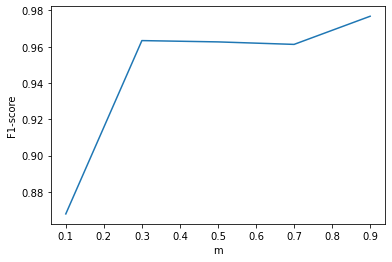

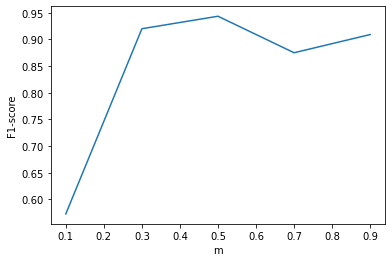

In [50]:
plt.plot(list1, yvalue)
plt.ylabel('F1-score')
plt.xlabel('m')
plt.show()
plt.plot(list1, xvalue)
plt.ylabel('F1-score')
plt.xlabel('m')
plt.show()